In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA,TruncatedSVD,NMF
from sklearn.preprocessing import Normalizer
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from scipy.interpolate import interp1d

In [2]:
co_occ_counts=pd.read_csv("/mount/projekte/sfb-732/b9/users/prajit/co_occ.sm",delim_whitespace=True,header=None)
co_occ_counts

,0,1,2
0,sein_V,sein_V,1774610
1,sein_V,tot_A,22832
2,sein_V,Präsident_N,18369
3,sein_V,offiziell_A,16208
4,sein_V,Wirkung_N,20543
5,sein_V,Spruch_N,3277
6,sein_V,Licht_N,20082
7,sein_V,Ausgabe_N,11875
8,sein_V,geschehen_V,26381
9,sein_V,intim_A,1117


In [3]:
co_occ_counts.columns=['word','context','freq']
co_occ_counts=pd.pivot_table(co_occ_counts,index=['word'],columns='context',values='freq',aggfunc=np.sum)
co_occ_counts

context,#_N,$_N,%_N,***_N,---_N,--_A,--_N,--_V,-innen_N,-innen_V,...,überörtlich_A,üblich_A,übrig_A,übrigbleiben_V,übrige_N,übrigen_N,übriger_N,üppig_A,„_A,„_N
word,,,,,,,,,,,,,,,,,,,,,
#_N,234.0,2.0,8.0,NaN,NaN,5.0,402.0,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$_N,2.0,1154.0,163.0,NaN,1.0,11.0,361.0,NaN,NaN,NaN,...,NaN,11.0,7.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN
%_N,8.0,163.0,116360.0,5.0,12.0,431.0,3133.0,10.0,20.0,10.0,...,10.0,425.0,891.0,13.0,47.0,9.0,2.0,17.0,NaN,NaN
***_N,NaN,NaN,5.0,184.0,NaN,5.0,110.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
---_N,NaN,1.0,12.0,NaN,20.0,4.0,659.0,5.0,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--_A,5.0,11.0,431.0,5.0,4.0,4128.0,15729.0,54.0,9.0,4.0,...,5.0,194.0,234.0,9.0,29.0,5.0,4.0,18.0,2.0,NaN
--_N,402.0,361.0,3133.0,110.0,659.0,15729.0,359384.0,1007.0,15.0,11.0,...,16.0,753.0,700.0,17.0,90.0,12.0,15.0,97.0,14.0,59.0
--_V,NaN,NaN,10.0,1.0,5.0,54.0,1007.0,38.0,NaN,NaN,...,NaN,7.0,2.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
-innen_N,NaN,NaN,20.0,NaN,NaN,9.0,15.0,NaN,230.0,140.0,...,NaN,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tot_count=np.nansum(co_occ_counts)
co_occ_counts=co_occ_counts.applymap(lambda x: x/tot_count)
co_occ_counts["sum"]=co_occ_counts.sum(axis=1)
co_occ_counts[co_occ_counts.columns[:-1]]=co_occ_counts[co_occ_counts.columns[:-1]]/(co_occ_counts[co_occ_counts.columns[:-1]].sum(axis=0)**0.75)
co_occ_counts=co_occ_counts.drop('sum',axis=1).div(co_occ_counts["sum"], axis=0)
co_occ_counts=co_occ_counts.applymap(lambda x:np.log2(x))
co_occ_counts=co_occ_counts.fillna(0)
co_occ_counts[co_occ_counts<0]=0
co_occ_counts

context,#_N,$_N,%_N,***_N,---_N,--_A,--_N,--_V,-innen_N,-innen_V,...,überörtlich_A,üblich_A,übrig_A,übrigbleiben_V,übrige_N,übrigen_N,übriger_N,üppig_A,„_A,„_N
word,,,,,,,,,,,,,,,,,,,,,
#_N,7.596577,0.000000,0.000000,0.000000,0.000000,0.0,1.505657,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
$_N,0.000000,6.898669,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
%_N,0.000000,0.000000,3.928716,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
***_N,0.000000,0.000000,0.000000,9.118351,0.000000,0.0,0.703723,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
---_N,0.000000,0.000000,0.000000,0.000000,5.478697,0.0,3.036201,2.067522,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
--_A,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
--_N,0.000000,0.000000,0.000000,0.000000,0.541300,0.0,2.147630,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
--_V,0.000000,0.000000,0.000000,0.000000,1.597130,0.0,1.766348,3.111955,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
-innen_N,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,7.022066,6.831028,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [15]:
co_occ_counts_svd = TruncatedSVD(n_components=10_000, n_iter=10, random_state=1991)
display(co_occ_counts_svd.fit(co_occ_counts).explained_variance_ratio_.sum())
co_occ_list=co_occ_counts_svd.fit(co_occ_counts).explained_variance_ratio_
#co_occ_reduced = co_occ_counts_svd.fit_transform(co_occ_counts)
#co_occ_reduced = Normalizer(copy=False).fit_transform(co_occ_reduced)
#co_occ_reduced=pd.DataFrame(co_occ_reduced,index=co_occ_counts.index)
#co_occ_reduced

0.88102335236077622

In [16]:
co_occ_series=pd.Series(co_occ_list)

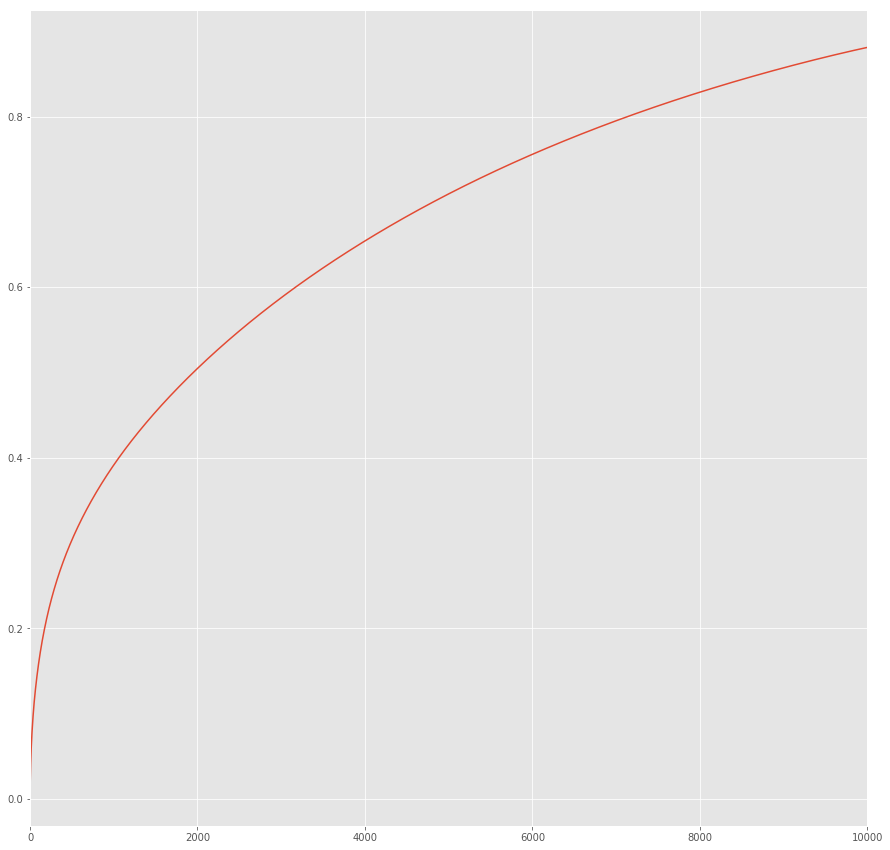

In [17]:
co_occ_series.cumsum().plot(figsize=[15,15])